# Problem Statement:
A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount,Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.(Classification)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Importing training Data

In [2]:
df=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Loan_project/training_set (1).csv')
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# Looking for missing values

In [4]:
df.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing value treatment

Divide data according to their datatypes, categorical and numerical

In [5]:
cat=[]
con=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [6]:
for i in cat:
        c=df[i].mode()[0]
        df[i]=df[i].fillna(c)  #-----> For catrgorical missisng values we will replace it with mode value of that feature       

        
for i in con:
        c=df[i].mean()
        df[i]=df[i].fillna(c)     #---->for numerical missing values we will replace it with mean value of that feature

In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Dropping Un-necessary features

In [8]:
df1=df.drop(['Loan_ID'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


# 1.)Check eligibility of the Customer given the inputs described above.(Classification)

Here we are classifying the loan eligibility.In our data feature called 'Loan_Status' ,which have YES and NO values means customer is eligible or not.

we will do exploratory data analysis with respect to Loan_Status.

Bivariate analysis

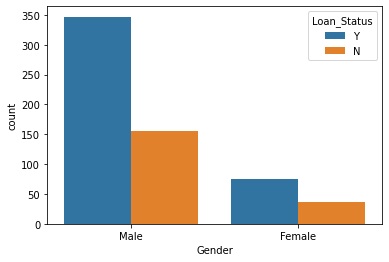

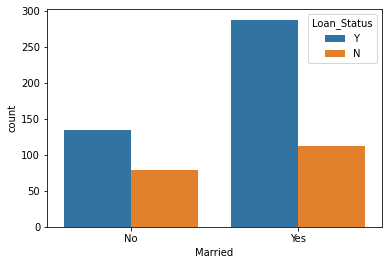

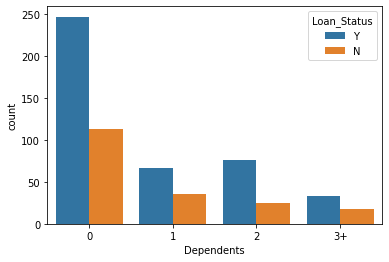

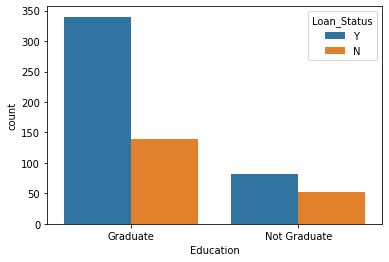

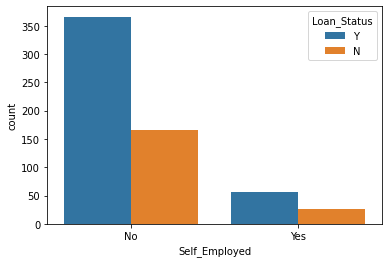

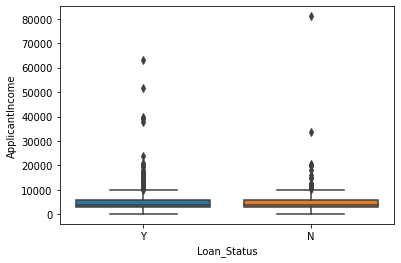

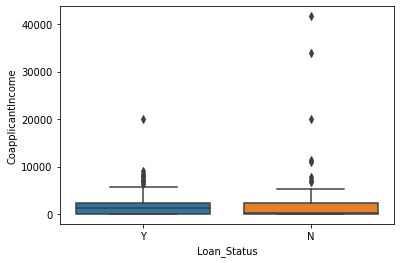

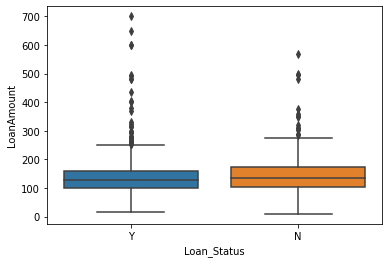

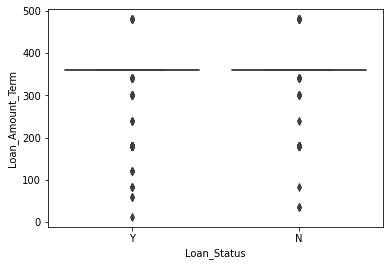

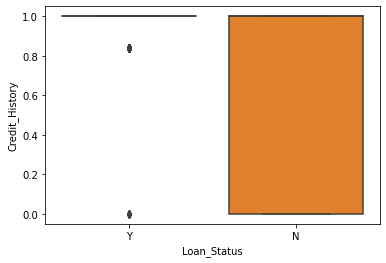

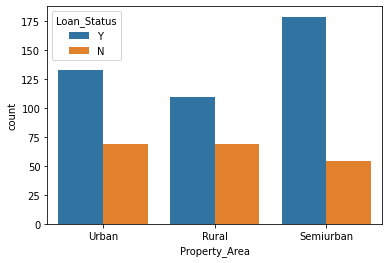

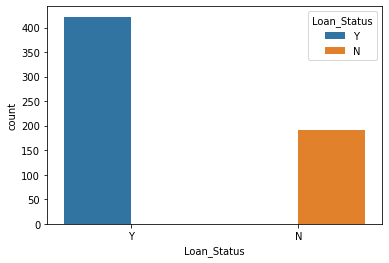

In [9]:
for i in df1.columns:
    if(df1[i].dtypes=='object'):
        sb.countplot(df1[i],hue=df1['Loan_Status'])
        plt.show()
    else:
        sb.boxplot(df1['Loan_Status'],df1[i])
        plt.show()

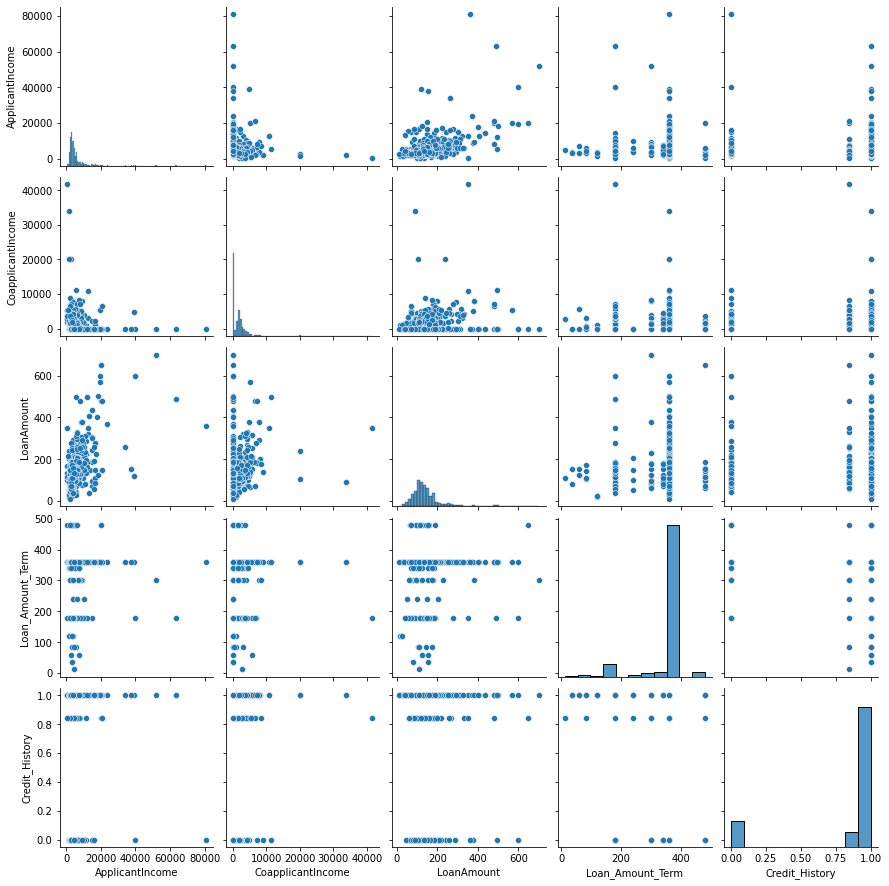

In [10]:
sb.pairplot(df1)

The data here is skewed and non linear

# Skewness in data

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

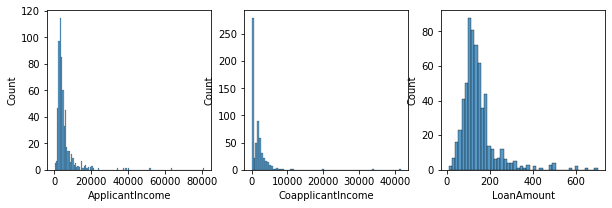

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sb.histplot(df1['ApplicantIncome'])
plt.subplot(3,3,2)
sb.histplot(df1['CoapplicantIncome'])
plt.subplot(3,3,3)
sb.histplot(df1['LoanAmount'])

It shows features are suffering from Negative skewness in data . Negative Skewness is where Mean < Median. skewness can be trated with log function.

In [12]:
df1.skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [13]:

def skew_rem(df,col):
    q = []
    for i in df[col]:
        if(i != 0):
            q.append(np.log(i))
        else:
            q.append(i)
    df[col] = q

In [14]:
skew_rem(df1,'CoapplicantIncome')
skew_rem(df1,'ApplicantIncome')            

#Feature selected with skew >3

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

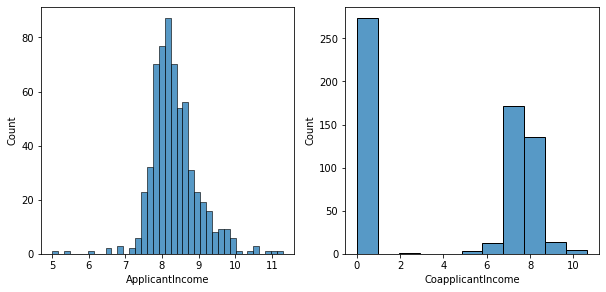

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sb.histplot(df1['ApplicantIncome'])
plt.subplot(2,2,2)
sb.histplot(df1['CoapplicantIncome'])

# Feature selection Uisng Anova and ChiSquare test

In [16]:
def ANOVA(df,cat,con):
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [17]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    import pandas as pd
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return b

In [18]:
from preprocessing_6PM import ANOVA,chisquare
imp_cols = []
for i in con:
    q = ANOVA(df1,"Loan_Status",i)
    print("-------------")
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

-------------
Loan_Status vs ApplicantIncome
Pval:  0.795
-------------
Loan_Status vs CoapplicantIncome
Pval:  0.134
-------------
Loan_Status vs LoanAmount
Pval:  0.368
-------------
Loan_Status vs Loan_Amount_Term
Pval:  0.604
-------------
Loan_Status vs Credit_History
Pval:  0.0


In [19]:
cat.remove('Loan_ID')

In [20]:
for i in cat:
    q = chisquare(df1,"Loan_Status",i)
    print("-------------")
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

-------------
Loan_Status vs Gender
Pval:  0.7391461310869638
-------------
Loan_Status vs Married
Pval:  0.029608580862582116
-------------
Loan_Status vs Dependents
Pval:  0.3688663081366005
-------------
Loan_Status vs Education
Pval:  0.04309962129357355
-------------
Loan_Status vs Self_Employed
Pval:  1.0
-------------
Loan_Status vs Property_Area
Pval:  0.0021360187811644915
-------------
Loan_Status vs Loan_Status
Pval:  1.544676456058992e-134


In [21]:
imp_cols

['CoapplicantIncome',
 'Credit_History',
 'Married',
 'Education',
 'Property_Area',
 'Loan_Status']

# Standardisation of Data

For categorical features we will use OHE(One Hot Encoding

In [22]:
dep = []
for i in df1.Dependents:
    dep.append(int(i.replace("3+","3")))
df1.Dependents=dep

In [23]:
df1.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [24]:
imp_cols

['CoapplicantIncome',
 'Credit_History',
 'Married',
 'Education',
 'Property_Area',
 'Loan_Status']

In [25]:
con1=list((set(imp_cols)-set(cat)))

In [26]:
con1

['CoapplicantIncome', 'Credit_History']

In [27]:
cat1=['Married','Education','Property_Area']

In [28]:
dfcat=pd.get_dummies(df1[cat1])
dfcat

,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,0,0,1
1,0,1,1,0,1,0,0
2,0,1,1,0,0,0,1
3,0,1,0,1,0,0,1
4,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0
610,0,1,1,0,1,0,0
611,0,1,1,0,0,0,1
612,0,1,1,0,0,0,1


For Numerical or continuos features we will use StandardScalar Standardisation

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dfcon=pd.DataFrame(ss.fit_transform(df1[con1]),columns=con1)

In [30]:
dfcon

,CoapplicantIncome,Credit_History
0,-1.107731,0.451640
1,0.782215,0.451640
2,-1.107731,0.451640
3,0.897656,0.451640
4,-1.107731,0.451640
...,...,...
609,-1.107731,0.451640
610,-1.107731,0.451640
611,0.307594,0.451640
612,-1.107731,0.451640


joining cat and con dataframes

In [31]:
X1=pd.concat([dfcon,dfcat],axis=1)
X1

,CoapplicantIncome,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.107731,0.451640,1,0,1,0,0,0,1
1,0.782215,0.451640,0,1,1,0,1,0,0
2,-1.107731,0.451640,0,1,1,0,0,0,1
3,0.897656,0.451640,0,1,0,1,0,0,1
4,-1.107731,0.451640,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,-1.107731,0.451640,1,0,1,0,1,0,0
610,-1.107731,0.451640,0,1,1,0,1,0,0
611,0.307594,0.451640,0,1,1,0,0,0,1
612,-1.107731,0.451640,0,1,1,0,0,0,1


Here we are classifying eligibility for loan ,so the target variable will be 'Loan_Status'.

In [32]:
Y=df1[['Loan_Status']]

In [33]:
def model_builder(mod):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score,confusion_matrix
    xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=31)
    model = mod.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr_acc1=round(tr_acc,3)
    ts_acc1=round(ts_acc,3)
    pred = model.predict(xtest)
    return tr_acc1,ts_acc1,confusion_matrix(ytest,pred)

In [34]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
model_builder(lo)

(0.796,
 0.854,
 array([[16, 18],
        [ 0, 89]], dtype=int64))

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=31)
model_builder(dtc)

(0.894,
 0.74,
 array([[17, 17],
        [15, 74]], dtype=int64))

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=31,max_depth=2)
model_builder(rf)

(0.802,
 0.854,
 array([[16, 18],
        [ 0, 89]], dtype=int64))

In [37]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(dtc)
model_builder(adb)

(0.894,
 0.78,
 array([[17, 17],
        [10, 79]], dtype=int64))

In [38]:
for i in range(1,40,1):
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    print("Results for max depth: %d"%i)
    print(model_builder(dtc))

Results for max depth: 1
(0.798, 0.854, array([[16, 18],
       [ 0, 89]], dtype=int64))
Results for max depth: 2
(0.804, 0.854, array([[16, 18],
       [ 0, 89]], dtype=int64))
Results for max depth: 3
(0.807, 0.854, array([[16, 18],
       [ 0, 89]], dtype=int64))
Results for max depth: 4
(0.811, 0.829, array([[13, 21],
       [ 0, 89]], dtype=int64))
Results for max depth: 5
(0.817, 0.821, array([[14, 20],
       [ 2, 87]], dtype=int64))
Results for max depth: 6
(0.827, 0.821, array([[15, 19],
       [ 3, 86]], dtype=int64))
Results for max depth: 7
(0.831, 0.813, array([[15, 19],
       [ 4, 85]], dtype=int64))
Results for max depth: 8
(0.837, 0.797, array([[15, 19],
       [ 6, 83]], dtype=int64))
Results for max depth: 9
(0.847, 0.78, array([[15, 19],
       [ 8, 81]], dtype=int64))
Results for max depth: 10
(0.855, 0.756, array([[15, 19],
       [11, 78]], dtype=int64))
Results for max depth: 11
(0.866, 0.772, array([[16, 18],
       [10, 79]], dtype=int64))
Results for max dept

In [41]:
for i in range(1,40,1):
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    print("Results for min_samples_leaf: %d"%i)
    print(model_builder(dtc))

Results for min_samples_leaf: 1
(0.894, 0.764, array([[18, 16],
       [13, 76]], dtype=int64))
Results for min_samples_leaf: 2
(0.837, 0.756, array([[23, 11],
       [19, 70]], dtype=int64))
Results for min_samples_leaf: 3
(0.823, 0.813, array([[18, 16],
       [ 7, 82]], dtype=int64))
Results for min_samples_leaf: 4
(0.817, 0.821, array([[18, 16],
       [ 6, 83]], dtype=int64))
Results for min_samples_leaf: 5
(0.815, 0.829, array([[17, 17],
       [ 4, 85]], dtype=int64))
Results for min_samples_leaf: 6
(0.807, 0.829, array([[17, 17],
       [ 4, 85]], dtype=int64))
Results for min_samples_leaf: 7
(0.802, 0.846, array([[18, 16],
       [ 3, 86]], dtype=int64))
Results for min_samples_leaf: 8
(0.802, 0.846, array([[18, 16],
       [ 3, 86]], dtype=int64))
Results for min_samples_leaf: 9
(0.802, 0.846, array([[18, 16],
       [ 3, 86]], dtype=int64))
Results for min_samples_leaf: 10
(0.8, 0.837, array([[17, 17],
       [ 3, 86]], dtype=int64))
Results for min_samples_leaf: 11
(0.798, 

In [44]:
for i in range(2,50):
    abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=31,max_depth=2),n_estimators=i)
    print("Results for n_estimators: %d"%i)
    print(model_builder(abc))

Results for n_estimators: 2
(0.804, 0.854, array([[16, 18],
       [ 0, 89]], dtype=int64))
Results for n_estimators: 3
(0.804, 0.854, array([[16, 18],
       [ 0, 89]], dtype=int64))
Results for n_estimators: 4
(0.813, 0.829, array([[14, 20],
       [ 1, 88]], dtype=int64))
Results for n_estimators: 5
(0.815, 0.829, array([[14, 20],
       [ 1, 88]], dtype=int64))
Results for n_estimators: 6
(0.817, 0.821, array([[14, 20],
       [ 2, 87]], dtype=int64))
Results for n_estimators: 7
(0.819, 0.821, array([[15, 19],
       [ 3, 86]], dtype=int64))
Results for n_estimators: 8
(0.823, 0.821, array([[15, 19],
       [ 3, 86]], dtype=int64))
Results for n_estimators: 9
(0.827, 0.821, array([[15, 19],
       [ 3, 86]], dtype=int64))
Results for n_estimators: 10
(0.829, 0.821, array([[15, 19],
       [ 3, 86]], dtype=int64))
Results for n_estimators: 11
(0.831, 0.821, array([[15, 19],
       [ 3, 86]], dtype=int64))
Results for n_estimators: 12
(0.831, 0.813, array([[14, 20],
       [ 3, 86]],

# ML Model for test data

we are getting good results with LogisticRegression coz its binary classification . we will work on test data with Logistic.

In [45]:
dft=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Loan_project/testing_set (1).csv')
dft

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [46]:
dft1=dft.drop(['Loan_ID'],axis=1)

In [51]:
imp_cols

['CoapplicantIncome',
 'Credit_History',
 'Married',
 'Education',
 'Property_Area',
 'Loan_Status']

In [50]:
cat.remove('Loan_Status')

In [52]:
for i in cat:
        c=dft1[i].mode()[0]
        dft1[i]=dft1[i].fillna(c)  #-----> For catrgorical missisng values we will replace it with mode value of that feature       

        
for i in con:
        c=dft1[i].mean()
        dft1[i]=dft1[i].fillna(c)     #---->for numerical missing values we will replace it with mean value of that feature

In [53]:
dft1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [54]:
dft1.Dependents.value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [55]:
dep = []
for i in dft1.Dependents:
    dep.append(int(i.replace("3+","3")))
dft1.Dependents=dep

In [56]:
cat1

['Married', 'Education', 'Property_Area']

In [57]:
m=pd.get_dummies(dft1[cat1])
m

,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,0,0,1
1,0,1,1,0,0,0,1
2,0,1,1,0,0,0,1
3,0,1,1,0,0,0,1
4,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,1
363,0,1,1,0,0,0,1
364,1,0,1,0,0,1,0
365,0,1,1,0,1,0,0


In [58]:
con1

['CoapplicantIncome', 'Credit_History']

In [60]:
n=pd.DataFrame(ss.fit_transform(dft1[con1]),columns=[con1])
n

,CoapplicantIncome,Credit_History
0,-0.673335,0.47918
1,-0.029848,0.47918
2,0.098849,0.47918
3,0.418877,0.00000
4,-0.673335,0.47918
...,...,...
362,0.088982,0.47918
363,-0.369180,0.47918
364,0.181644,0.00000
365,0.353241,0.47918


In [61]:
x=pd.concat([n,m],axis=1)
Xt=pd.DataFrame(x)

In [62]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (CoapplicantIncome,)     367 non-null    float64
 1   (Credit_History,)        367 non-null    float64
 2   Married_No               367 non-null    uint8  
 3   Married_Yes              367 non-null    uint8  
 4   Education_Graduate       367 non-null    uint8  
 5   Education_Not Graduate   367 non-null    uint8  
 6   Property_Area_Rural      367 non-null    uint8  
 7   Property_Area_Semiurban  367 non-null    uint8  
 8   Property_Area_Urban      367 non-null    uint8  
dtypes: float64(2), uint8(7)
memory usage: 8.4 KB


# Creating model for train data

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=31)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=31,max_depth=2)
model=dtc.fit(xtrain,ytrain)

In [65]:
model.predict(Xt)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

# Getting prediction on test data

In [67]:
X1.shape

(614, 9)

In [68]:
Xt.shape

(367, 9)

In [69]:
dft1['Loan_Status']=model.predict(Xt)

In [70]:
dft1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban,Y
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban,Y
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban,Y
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural,Y
